<a href="https://colab.research.google.com/github/Hassan7838/titanic-logistic-regression/blob/main/titanic_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Logistic Regression for Surrvival Prediction

#choosing file from local drive
from google.colab import files
upload = files.upload()

Saving train.csv to train (1).csv


In [ ]:
# Loading File
import pandas as pd
df = pd.read_csv("train.csv")

# Viewing File Data
print("\n---First 5 rows---")
print(df.head())

print("\n---Shape of data---")
print(df.shape)

print("\n---Column and type---")
print(df.info())

print("\n---Missing values---")
print(df.isnull().sum())


---First 5 rows---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500

In [ ]:
# Filling Missing Values
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Confirm changes
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


/tmp/ipython-input-634645951.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-634645951.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
# Label encode 'Sex'
df['Sex'] = df['Sex'].str.lower()
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)
df = pd.concat([df, embarked_dummies], axis=1)
df.drop('Embarked', axis=1, inplace=True)

# One-hot encode 'class'
class_dummies = pd.get_dummies(df['Pclass'], prefix='Pclass', drop_first=True)
df = pd.concat([df,class_dummies],axis=1)
df.drop('Pclass',axis=1, inplace=True)

# Check result
print(df.head())

   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

   Sex   Age  SibSp  Parch            Ticket     Fare Cabin  Embarked_Q  \
0    0  22.0      1      0         A/5 21171   7.2500   NaN       False   
1    1  38.0      1      0          PC 17599  71.2833   C85       False   
2    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN       False   
3    1  35.0      1      0            113803  53.1000  C123       False   
4    0  35.0      0      0            373450   8.0500   NaN       False   

   Embarked_S  Pclass_2  Pclass_3  
0        True     False      True  
1 

In [ ]:
# Adding FamilySize Feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print(df.head())

   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

   Sex   Age  SibSp  Parch            Ticket     Fare Cabin  Embarked_Q  \
0    0  22.0      1      0         A/5 21171   7.2500   NaN       False   
1    1  38.0      1      0          PC 17599  71.2833   C85       False   
2    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN       False   
3    1  35.0      1      0            113803  53.1000  C123       False   
4    0  35.0      0      0            373450   8.0500   NaN       False   

   Embarked_S  Pclass_2  Pclass_3  FamilySize  
0        True     False   

In [ ]:
# checking datatype of survived column
print(df['Survived'].dtype)

int64


In [ ]:
# dropping columns that are not useful
# (x) features
X = df.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)

# (y) target
y = df['Survived']

In [ ]:
# Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
# Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Accuracy Score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)
print('Accuracy : {:2f}'.format(accuracy))

Accuracy : 0.804469


In [ ]:
# Precision Score
from sklearn.metrics import precision_score

precision = precision_score(y_test,y_pred)
print('Precision : {:2f}'.format(precision))

Precision : 0.796875


In [ ]:
# Recall Score
from sklearn.metrics import recall_score

recall = recall_score(y_test,y_pred)
print('Recall : {:2f}'.format(recall))

Recall : 0.698630


In [ ]:
# f1 Score
from sklearn.metrics import f1_score

f1 = f1_score(y_test,y_pred)
print('F1 : {:2f}'.format(f1))

F1 : 0.744526


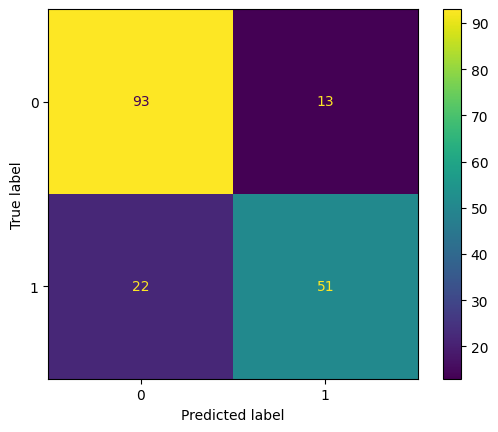

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

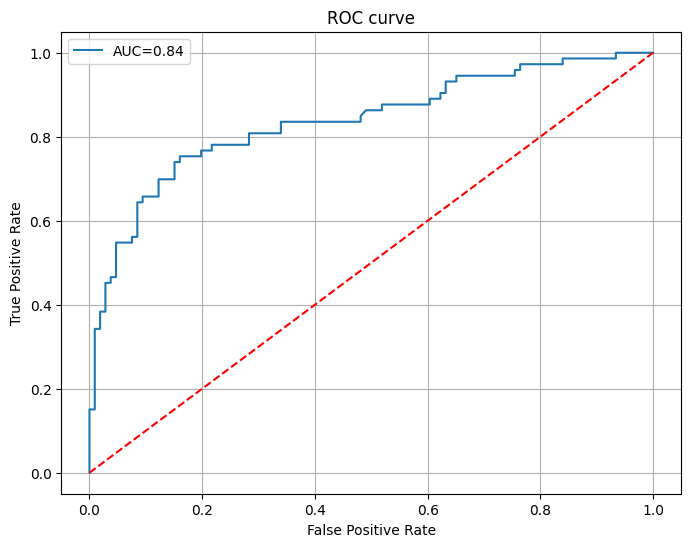

In [ ]:
# ROC --> Receiver Operating Characteristics
# AUC --> Area Under Curve

from sklearn.metrics import roc_curve,roc_auc_score

# getting probabilities
y_prob = model.predict_proba(X_test)[:,1]

# generate roc curve
fpr,tpr,thresholds = roc_curve(y_test,y_prob)

# calculating auc
auc_score = roc_auc_score(y_test,y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label=f'AUC={auc_score:.2f}')
plt.plot([0,1],[0,1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.grid(True)
plt.show()